## Is NYCT_4588 on Schedule??
# If not, how much delay is expected?
# On what days are the delay expected?
# which hours of the day delay is expected?

In [2]:
# import Required packages
import plotly
import pandas
#import plotly.express as px
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

import descartes
sns.set(style="ticks", color_codes=True)
plt.style.use('seaborn-whitegrid')

#import pandas_bokeh
#pandas_bokeh.output_notebook()
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [3]:
# read in the New York Bus Routes dataset
df = pd.read_csv("MTA-1706.csv")
print("The dataframe has :",df.shape)

The dataframe has : (1048575, 18)


C:\Users\Suhasini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
df.columns ## the columns in the df

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime', 'Unnamed: 17'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
RecordedAtTime               1048575 non-null object
DirectionRef                 1048575 non-null int64
PublishedLineName            1048575 non-null object
OriginName                   1040112 non-null object
OriginLat                    1040112 non-null float64
OriginLong                   1040112 non-null float64
DestinationName              1048575 non-null object
DestinationLat               1047329 non-null float64
DestinationLong              1047329 non-null float64
VehicleRef                   1048575 non-null object
VehicleLocation.Latitude     1048575 non-null float64
VehicleLocation.Longitude    1048575 non-null float64
NextStopPointName            1047439 non-null object
ArrivalProximityText         1047439 non-null object
DistanceFromStop             1047439 non-null object
ExpectedArrivalTime          931342 non-null object
ScheduledArrivalTime         102290

In [6]:
df.drop(['Unnamed: 17'], axis=1,inplace=True) # drop columns not required

In [11]:
df.head(5)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,6/1/2017 0:03,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76,6/1/2017 0:03,24:06:14
1,6/1/2017 0:03,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62,6/1/2017 0:03,23:58:02
2,6/1/2017 0:03,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5,6/1/2017 0:03,24:00:53
3,6/1/2017 0:03,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267,6/1/2017 0:04,24:03:00
4,6/1/2017 0:03,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11,6/1/2017 0:03,23:59:38


## Is B6 running on Schedule?

In [21]:
pandas.set_option('display.max_columns',None)
B6 = df[df.PublishedLineName == 'B6']

In [22]:
#change to datetime datadtype
B6.RecordedAtTime = pd.to_datetime(B6.RecordedAtTime)
B6.ExpectedArrivalTime = pd.to_datetime(B6.ExpectedArrivalTime)
print("The length of dataframe before excluding midnight hours  : ", len(B6))


## exclude midnight hours
time_mask = (B6['RecordedAtTime'].dt.hour >= 3) & (B6['RecordedAtTime'].dt.hour < 23)
B6 = B6[time_mask]
print("The Published line - B6 has " , len(B6) , " rows after exlcuding midnight hours")

C:\Users\Suhasini\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



The length of dataframe before excluding midnight hours  :  19825
The Published line - B6 has  18862  rows after exlcuding midnight hours


In [25]:
B6.VehicleRef.min()

'NYCT_4855'

In [49]:
B6.groupby(['VehicleRef','OriginName','DestinationName'])['VehicleRef'].count()

VehicleRef  OriginName                         DestinationName          
NYCT_4855   AV J/CONEY ISLAND AV               ROCK PKY STA                   5
            BEDFORD AV/CAMPUS ROAD             BENSONHURST HARWAY AV          4
            HARWAY AV/BAY 37 ST                EAST NY NEW LOTS STA           6
                                               LTD EAST NY NEW LOTS STA      73
                                               ROCK PKY STA                  22
            LIVONIA AV/ASHFORD ST              BENSONHURST HARWAY AV         11
                                               LTD BENSONHURST HARWAY AV     58
            ROCKAWAY STATION/ROCKAWAY STATION  AVENUE J CONEY IS AV           3
                                               BENSONHURST HARWAY AV         20
NYCT_4856   AV J/CONEY ISLAND AV               ROCK PKY STA                   7
            HARWAY AV/BAY 37 ST                LTD EAST NY NEW LOTS STA      74
                                               

## Considering vehicle ref # NYCT_4855

In [27]:
## create a subset from B6 for NYCt 4855
B6_NYCT4855 = B6[B6.VehicleRef == 'NYCT_4855']

In [28]:
B6_NYCT4855.head(5)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
16856,2017-06-01 06:13:00,0,B6,HARWAY AV/BAY 37 ST,40.59351,-73.993996,LTD EAST NY NEW LOTS STA,40.66642,-73.883385,NYCT_4855,40.596962,-73.998329,CROPSEY AV/BAY 31 ST,at stop,4,2017-06-01 06:13:00,6:11:04
18447,2017-06-01 06:24:00,0,B6,HARWAY AV/BAY 37 ST,40.59351,-73.993996,LTD EAST NY NEW LOTS STA,40.66642,-73.883385,NYCT_4855,40.615230,-73.979986,BAY PY/62 ST,approaching,80,2017-06-01 06:24:00,6:24:18
20201,2017-06-01 06:33:00,0,B6,HARWAY AV/BAY 37 ST,40.59351,-73.993996,LTD EAST NY NEW LOTS STA,40.66642,-73.883385,NYCT_4855,40.625681,-73.956832,AV J/OCEAN AV,approaching,54,2017-06-01 06:34:00,6:35:45
22143,2017-06-01 06:43:00,0,B6,HARWAY AV/BAY 37 ST,40.59351,-73.993996,LTD EAST NY NEW LOTS STA,40.66642,-73.883385,NYCT_4855,40.633969,-73.948222,GLENWOOD RD/NOSTRAND AV,approaching,33,2017-06-01 06:44:00,6:45:00
24285,2017-06-01 06:54:00,0,B6,HARWAY AV/BAY 37 ST,40.59351,-73.993996,LTD EAST NY NEW LOTS STA,40.66642,-73.883385,NYCT_4855,40.633090,-73.924471,RALPH AV/GLENWOOD RD,< 1 stop away,576,2017-06-01 06:56:00,6:56:35


In [29]:
## Calculate delay in seconds then add it as another column in B6
expected_hours  = B6_NYCT4855.ExpectedArrivalTime.dt.hour
expected_minutes = B6_NYCT4855.ExpectedArrivalTime.dt.minute
expected_seconds = B6_NYCT4855.ExpectedArrivalTime.dt.second

In [30]:
scheduled_hours = B6_NYCT4855.ScheduledArrivalTime.str.split(':').str[-3].astype(float)
scheduled_minutes = B6_NYCT4855.ScheduledArrivalTime.str.split(':').str[-2].astype(float)
scheduled_seconds = B6_NYCT4855.ScheduledArrivalTime.str.split(':').str[-1].astype(float)

In [31]:
## Calculate the vehicle delay 
B6_NYCT4855['VehicleDelay'] = 3600 *(expected_hours - scheduled_hours) +60 * (expected_minutes - scheduled_minutes) +(expected_seconds - scheduled_seconds)

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
B6_NYCT4855['day_of_week'] = B6_NYCT4855['RecordedAtTime'].dt.weekday_name  ## create a week day field

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
#B6_NYCT4855.fillna(0,inplace = True)
## replace NAN values with mean of the column value....

B6_NYCT4855['VehicleDelay'].fillna((B6_NYCT4855['VehicleDelay'].mean()), inplace=True)

C:\Users\Suhasini\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
## create a list of the columns we are going to consider
cols_of_interest = ['RecordedAtTime','OriginName','DestinationName','VehicleRef','ExpectedArrivalTime',
       'ScheduledArrivalTime', 'VehicleDelay', 'day_of_week']
B6_NYCT4855 = B6_NYCT4855[cols_of_interest]

## Data Visulizations!! 

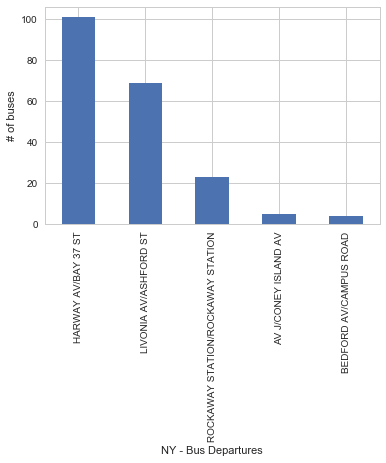

In [41]:
B6_NYCT4855['OriginName'].value_counts().plot(kind='bar'); 
plt.xlabel("NY - Bus Departures");
plt.ylabel("# of buses");

## Harway Av/Bay 37 st seems to be pretty busy and has more frequency of buses

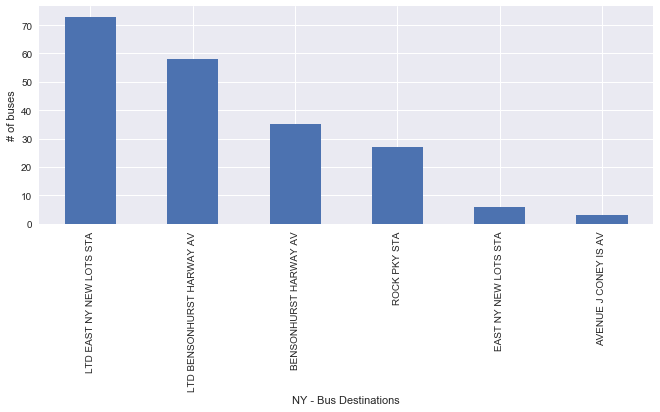

In [77]:
B6_NYCT4855['DestinationName'].value_counts().plot(kind='bar');
plt.xlabel("NY - Bus Destinations");
plt.ylabel("# of buses");

 # LTD EAST NY New Lots STA has more frequency for buses

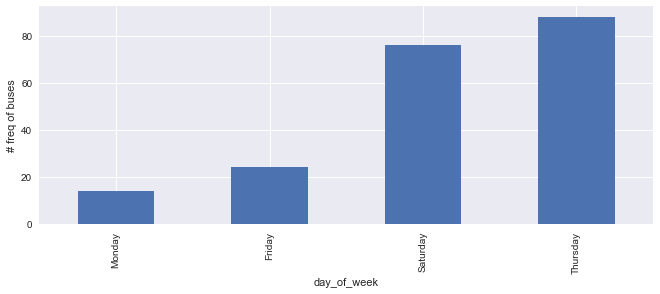

In [76]:
B6_NYCT4855.groupby('day_of_week').size().sort_values().plot(kind='bar'); 
plt.ylabel("# freq of buses");

## frequency of buses is more on Thursdays

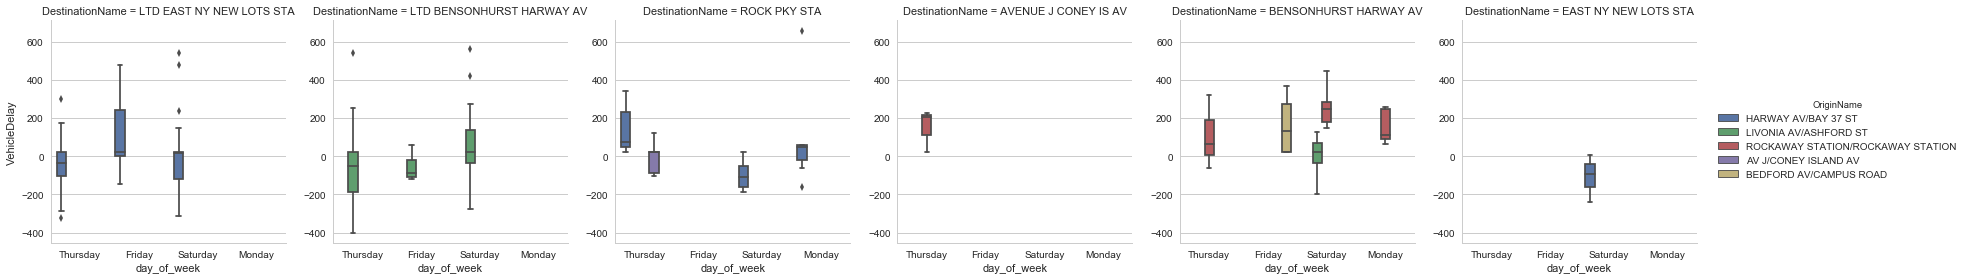

In [53]:
sns.factorplot(data=B6_NYCT4855,x='day_of_week',y='VehicleDelay',hue='OriginName',col='DestinationName',kind='box');
plt.show()

## Origin - avoid Harway Av - Destination to Rock Pky - on thursday - like to take more travel time than AV /Coney island route


In [55]:
## creating groups!!
B6_NYCT4855_grp1 = B6_NYCT4855.groupby(['VehicleRef','OriginName','DestinationName','day_of_week','ScheduledArrivalTime'])['VehicleDelay'].max()

In [57]:
B6_NYCT4855_grp1.head(2)

VehicleRef  OriginName            DestinationName  day_of_week  ScheduledArrivalTime
NYCT_4855   AV J/CONEY ISLAND AV  ROCK PKY STA     Thursday     12:25:43               -103.0
                                                                12:35:28                -88.0
Name: VehicleDelay, dtype: float64

In [58]:
B6_NYCT4855_grp2 = B6_NYCT4855.groupby(['OriginName','DestinationName','day_of_week'])['ScheduledArrivalTime','VehicleDelay'].max()

In [59]:
B6_NYCT4855_grp2.head(5)

VehicleDelay
OriginName             DestinationName          day_of_week              
AV J/CONEY ISLAND AV   ROCK PKY STA             Thursday            120.0
BEDFORD AV/CAMPUS ROAD BENSONHURST HARWAY AV    Friday              367.0
HARWAY AV/BAY 37 ST    EAST NY NEW LOTS STA     Saturday              9.0
                       LTD EAST NY NEW LOTS STA Friday              480.0
                                                Saturday            540.0

## If the Origin is "ROCKAWAY STATION/" and destination is "BENSONHURST HARWAY AV",
## the delay is more likely on Saturday than other days

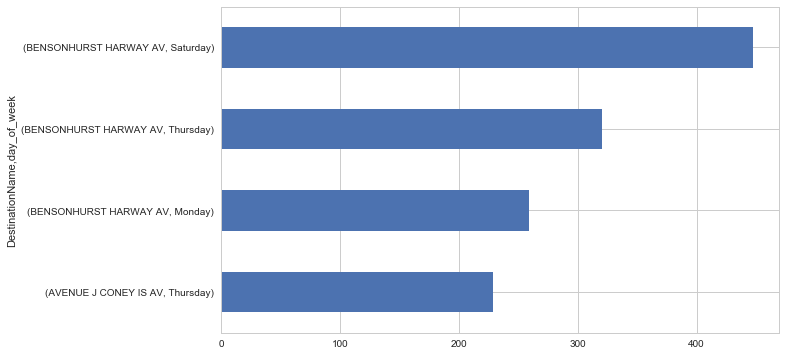

In [63]:
B6_NYCT4855[
    B6_NYCT4855['OriginName'] == 'ROCKAWAY STATION/ROCKAWAY STATION'
].groupby(['DestinationName','day_of_week'])['VehicleDelay']\
       .max().sort_values().plot(
    kind='barh',
    figsize=(10,6)
    );

## If Origin is "HARWAY AV/BAY 37 ST" and destination is "ROCK PKY STA" then delay is likely to be more on Monday
## If Origin is "HARWAY AV/BAY 37 ST" and destination is "LTD EAST NY NEW LOTS STA" then delay is likely to be more on Saturday

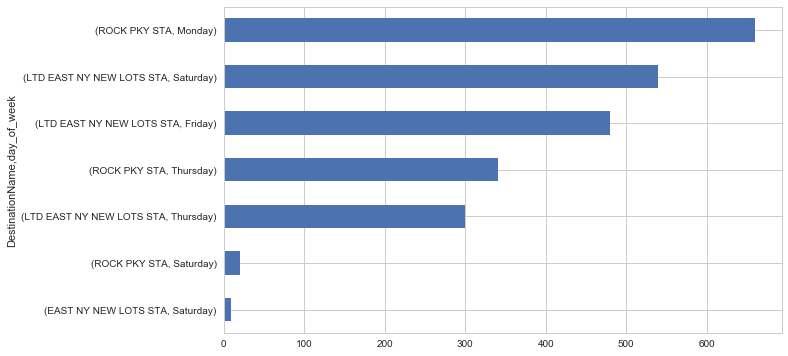

In [66]:
B6_NYCT4855[
    B6_NYCT4855['OriginName'] == 'HARWAY AV/BAY 37 ST'
].groupby(['DestinationName','day_of_week'])['VehicleDelay']\
       .max().sort_values().plot(
    kind='barh',
    figsize=(10,6)
);

## If Origin is "LIVONIA AV/ASHFORD ST" and destination is "LTD BENSONHURST HARWAY AV" then delay is likely to be similar on Thursday's and Saturday's

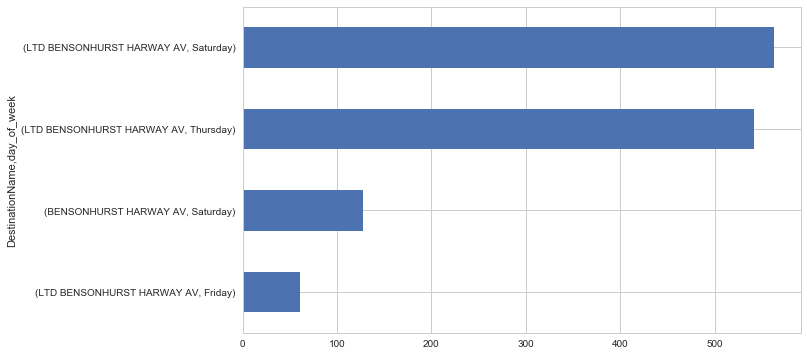

In [67]:
B6_NYCT4855[
    B6_NYCT4855['OriginName'] == 'LIVONIA AV/ASHFORD ST'
].groupby(['DestinationName','day_of_week'])['VehicleDelay']\
       .max().sort_values().plot(
    kind='barh',
    figsize=(10,6)
);

## Time Series Analysis -----------------

In [68]:
B6_NYCT4855_timeseries =  B6_NYCT4855[['RecordedAtTime','VehicleDelay']]
B6_NYCT4855_timeseries = B6_NYCT4855_timeseries.set_index('RecordedAtTime')
B6_NYCT4855_timeseries.head(4)

,VehicleDelay
RecordedAtTime,
2017-06-01 06:13:00,116.0
2017-06-01 06:24:00,-18.0
2017-06-01 06:33:00,-105.0
2017-06-01 06:43:00,-60.0


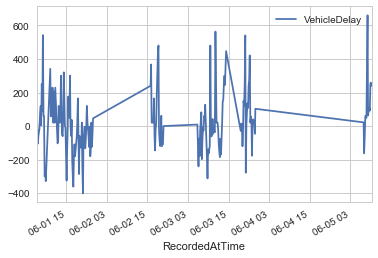

In [69]:
B6_NYCT4855_timeseries.plot(grid=True);

## Note that in Time Series plots, time is usually plotted on the x-axis while the y-axis is usually the magnitude of the data.

In [70]:
B6_NYCT4855_timeseries['Year'] = B6_NYCT4855_timeseries.index.year
B6_NYCT4855_timeseries['Month'] = B6_NYCT4855_timeseries.index.month
B6_NYCT4855_timeseries['Weekday Name'] =B6_NYCT4855_timeseries.index.weekday_name
B6_NYCT4855_timeseries['WeekDate'] =B6_NYCT4855_timeseries.index.date
B6_NYCT4855_timeseries['Hours'] =B6_NYCT4855_timeseries.index.hour
B6_NYCT4855_timeseries['Mins'] =B6_NYCT4855_timeseries.index.minute
B6_NYCT4855_timeseries['Secs'] =B6_NYCT4855_timeseries.index.second

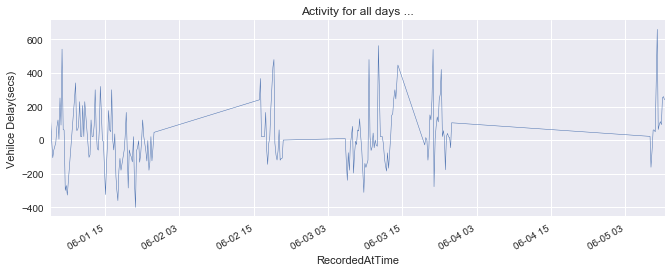

In [82]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
B6_NYCT4855_timeseries['VehicleDelay'].plot(linewidth=0.5);
plt.ylabel("Vehilce Delay(secs)");
plt.title("Activity for all days ...");

## plot to show the delay for a day

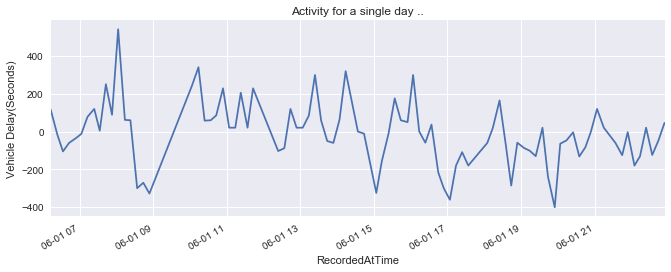

In [84]:
ax = B6_NYCT4855_timeseries.loc['2017-06-01', 'VehicleDelay'].plot()
ax.set_ylabel('Vehicle Delay(Seconds)');
plt.title("Activity for a single day ..");

## expect delays during the morning 8-9 am rush hour 

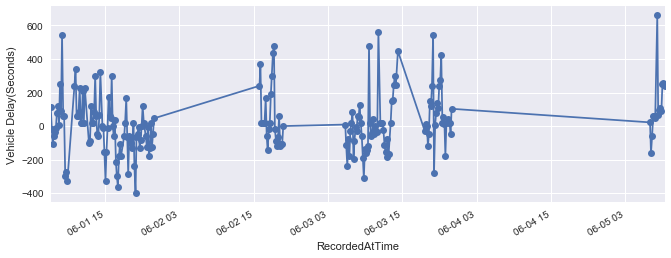

In [89]:
ax = B6_NYCT4855_timeseries.loc['2017-06-01':'2017-06-05', 'VehicleDelay'].plot(marker='o', linestyle='-')
ax.set_ylabel('Vehicle Delay(Seconds)');